In [1]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('rt_reviews.csv',encoding='latin-1')
df=pd.DataFrame(data)
df.head(10)

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...
5,rotten,"Gleeson goes the Hallmark Channel route, dama..."
6,fresh,It was the height of satire in 1976: dark as ...
7,rotten,"Everyone in ""The Comedian"" deserves a better ..."
8,rotten,Actor encourages grumpy Christians to embrace...
9,fresh,"Slight, contained, but ineffably soulful."


## Building Vocabulary

In [3]:
def vocabulary(text):
    #removing the digits and few unnecessary punctuations from our review texts
    
    text = re.sub('[0-9]',' ', text)
    text = re.sub('[^\\w\\s]',' ', text)
    text = text.lower() 
    v=text.split()
    
    # Removing Stop Words
    stop_words = stopwords.words('english')
    i=0
    while i<len(v):
        if v[i] in stop_words :     
            v.pop(i)     
            i=0
        i+=1
    
    return v  

In [4]:
# Perform preprocessing on each row of the text data 
updated_text = []
for index, row in df.iterrows():
    updated_text.append(vocabulary(row['Review']))
df['Updated_Review'] = updated_text
# visualize dataframe after adding 'preprocessed_Text' column
df.head(10)

,Freshness,Review,Updated_Review
0,fresh,"Manakamana doesn't answer any questions, yet ...","[manakamana, answer, questions, yet, makes, po..."
1,fresh,Wilfully offensive and powered by a chest-thu...,"[wilfully, offensive, powered, chest, thumping..."
2,rotten,It would be difficult to imagine material mor...,"[would, difficult, imagine, material, wrong, s..."
3,rotten,Despite the gusto its star brings to the role...,"[despite, gusto, star, brings, role, hard, rid..."
4,rotten,If there was a good idea at the core of this ...,"[there, good, idea, core, film, buried, unsigh..."
5,rotten,"Gleeson goes the Hallmark Channel route, dama...","[gleeson, goes, hallmark, channel, route, dama..."
6,fresh,It was the height of satire in 1976: dark as ...,"[was, height, satire, dark, hell, patently, ab..."
7,rotten,"Everyone in ""The Comedian"" deserves a better ...","[everyone, comedian, deserves, better, movie, ..."
8,rotten,Actor encourages grumpy Christians to embrace...,"[actor, encourages, grumpy, christians, embrac..."
9,fresh,"Slight, contained, but ineffably soulful.","[slight, contained, ineffably, soulful]"


## Splitting Data

In [5]:
# Split Data in to Train (80%),Test(15%), Validation (15%) 

X_train, X_test, y_train, y_test = train_test_split(df,df['Freshness'] ,test_size=0.2, random_state=1)

X_test, X_dev, y_test, y_dev = train_test_split(X_test,X_test['Freshness'] ,test_size=0.5, random_state=1)


In [6]:
# get unique words in the dataset
word_set=set()
for index, row in X_train.iterrows():           #unique collections of words in a set to avoid repetitions
    word_set.update(row['Updated_Review'])

In [7]:
unique_training_types = list(y_train.unique())
#print(unique_training_types)
dict_types = {}
for class_type in unique_training_types:
    dict_types[class_type] = sum(y_train == class_type)

for key_type, count in dict_types.items():
    print(key_type + ": " + str(count))
  


rotten: 191876
fresh: 192124


## Data Visualization

dict_values([191876, 192124])


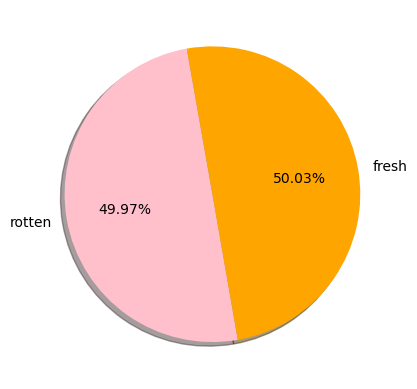

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
labels = dict_types.keys()
count = dict_types.values()
print(count)
# Plot
plt.pie(count, labels=labels, 
        autopct='%0.2f%%', shadow=True, startangle=100, colors=['pink',  'orange'])
#plt.axis('equal')
plt.show()

In [9]:
#using set to find the each occurence of word
Fresh=set()                 
Rotten=set()

for index, row in X_train.iterrows(): 
    if row['Freshness']=='fresh':
        words=row['Updated_Review']   # pre-processed column
        Fresh.update(words)

    elif row['Freshness']=='rotten':
        words=row['Updated_Review']
        Rotten.update(words)


## Calculating frequency of each word

In [10]:
# Checking frequency of a word for each class type
dict_Fresh={}
dict_Rotten={}           

for word in Fresh:
    dict_Fresh[word]=0
for word in Rotten:
    dict_Rotten[word]=0  

    #frequencies
for index, row in X_train.iterrows(): 
    if row['Freshness']=='fresh':
        words=row['Updated_Review']          
        for word_dict in words:
              dict_Fresh[word_dict]+=1

    elif row['Freshness']=='rotten':
        words=row['Updated_Review']          
        for word_dict in words:
              dict_Rotten[word_dict]+=1
#print(dict_Fresh)


In [11]:
labels=set()
for index,row in X_train.iterrows():
    labels.add(row['Freshness'])

## Naive_Bayes function to calculate the probabilities and generate reports

In [12]:
def Naive_Bayes( X= X_test, Y = y_test, smoothing=False, alpha=0.01):
    
# Code for calculating prior probabilities
    if smoothing == True:
        alpha=alpha
    else:
        alpha= 0
    
    Freshness_count={}   # dictionary to store total class occurances for each class
    for  label_type in labels:
        count=0
        for index,row in X_train.iterrows():
            if label_type==row['Freshness']:
                count+=1
        Freshness_count[label_type]=count

    print('*******************************RESULTS WHEN ALPHA=',alpha,'*****************************************')
    
    prior_Fresh= (Freshness_count['fresh'])/len(X_train)
    prior_Rotten= (Freshness_count['rotten'])/len(X_train)
    
    print("Fresh=",prior_Fresh)
    print("Rotten=", prior_Rotten )
    
    
# code for conditional probability for each class
    
    #summing up the total number of words in each Type
    total_Fresh_words = 0
    total_Rotten_words = 0
    
    for key,values in dict_Fresh.items():
        total_Fresh_words = total_Fresh_words+values
    for key,values in dict_Rotten.items():
        total_Rotten_words = total_Rotten_words+values
        
    # Conditional probabilites of each word
    cond_Fresh = {}
    cond_Rotten = {}
    
    for word in dict_Fresh:
        cond_Fresh[word] = dict_Fresh[word]/total_Fresh_words
    for word in dict_Rotten:
        cond_Rotten[word] = dict_Rotten[word]/total_Rotten_words
    

    #use Laplace smoothing if word is not present
    k = len(word_set)
    for word in word_set:
        if word not in Fresh:
            cond_Fresh[word]=alpha/(total_Fresh_words+alpha*k)
        if word not in Rotten:                   
            cond_Rotten[word]=alpha/(total_Rotten_words+alpha*k)
        

# Code for posterior probabilities
    
    pred_test_label = []
    for index,row in X.iterrows():
        test_words=row['Updated_Review']
        
        # zero-frequency condition so add a laplace smoothing
        k = len(test_words)
        for word in test_words:
            if word not in word_set:
                cond_Fresh[word]=alpha/(total_Fresh_words+alpha*k)
                cond_Rotten[word]=alpha/(total_Rotten_words+alpha*k)
                
        # product
        posterior_Fresh=1
        posterior_Rotten=1
    
        for word in test_words:
            posterior_Fresh*=cond_Fresh[word]
            posterior_Rotten*=cond_Rotten[word]
            
        # multiplicating likelihood probabilities with prior
        posterior_Fresh=posterior_Fresh*prior_Fresh/(1)
        posterior_Rotten=posterior_Rotten*prior_Rotten/(1)  

        dict_label = []
        dict_label.append(posterior_Fresh)
        dict_label.append(posterior_Rotten)
        
        # checking the max argument
        idx = dict_label.index(max(dict_label))
        labels_list = ['fresh','rotten']
        pred_test_label.append(labels_list[idx])
        
# Result Analysis Report
    print(classification_report(Y, pred_test_label))


## No smoothing applied on validation data

In [13]:
# without smoothing
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=False)

*******************************RESULTS WHEN ALPHA= 0 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.79      0.80      0.80     24053
      rotten       0.80      0.79      0.79     23947

    accuracy                           0.79     48000
   macro avg       0.79      0.79      0.79     48000
weighted avg       0.79      0.79      0.79     48000



## For smoothing values 0.01,0.1,1 on validation data

In [14]:
# with Laplace smoothing tuning of hyper paprameters
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=0.01)
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=0.1)
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=1)

*******************************RESULTS WHEN ALPHA= 0.01 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.81      0.79      0.80     24053
      rotten       0.79      0.82      0.80     23947

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000

*******************************RESULTS WHEN ALPHA= 0.1 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.81      0.79      0.80     24053
      rotten       0.79      0.82      0.81     23947

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000

*******************************RESULTS WHEN A

## Further experimenting on smoothing values 0.001,10,100,1000

In [15]:
# Laplace smoothing tuning of hyper paprameters
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=0.001)
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=10)
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=100)
Naive_Bayes(X = X_dev, Y = y_dev, smoothing=True, alpha=1000)


*******************************RESULTS WHEN ALPHA= 0.001 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.81      0.78      0.80     24053
      rotten       0.79      0.82      0.80     23947

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000

*******************************RESULTS WHEN ALPHA= 10 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.79      0.77      0.78     24053
      rotten       0.77      0.79      0.78     23947

    accuracy                           0.78     48000
   macro avg       0.78      0.78      0.78     48000
weighted avg       0.78      0.78      0.78     48000

*******************************RESULTS WHEN A

## Test Accuracy

In [34]:
# Highest accuracy observed at a =0.1
# Using best 'a' value on val data to perform inference on test data
Naive_Bayes(X = X_test, Y = y_test, smoothing=True, alpha=1.0)

*******************************RESULTS WHEN ALPHA= 1.0 *****************************************
Fresh= 0.5003229166666666
Rotten= 0.4996770833333333
              precision    recall  f1-score   support

       fresh       0.81      0.79      0.80     23823
      rotten       0.80      0.81      0.81     24177

    accuracy                           0.80     48000
   macro avg       0.80      0.80      0.80     48000
weighted avg       0.80      0.80      0.80     48000

Test accuracy


## Fetching Top 10 words

In [35]:
import itertools 

# create list of dictionaries for all classes
dicts = [dict_Fresh, dict_Rotten]

# find common keys in all classes
similarity = set(dict_Fresh.keys())

for d in dicts:
    similarity.intersection_update(set(d.keys()))

similar_dict = {}
similarity = list(similarity)
#print(common_keys)

# find the highest frequency of common keys accross all classes
for word in similarity:
    high_prob = 0
    for d in dicts:
        if(d[word]>high_prob):
            similar_dict[word] = d[word]
#print(similar_dict)

# Create a dictionary of common keys and highest frequency of that key across classes
similar_dict = {}
similarity = list(similarity)
for word in similarity:
    val_list = []
    val_list.append(dicts[0][word])
    val_list.append(dicts[1][word])    
    similar_dict[word] = max(val_list)

# sort dictionary based on frequency of key word
top_words = dict(sorted(similar_dict.items(), key=lambda item: item[1], reverse=True))
# print top 10 words
top_10_words = dict(itertools.islice(top_words.items(), 10)) 
print('The Top 10 Words are')
print(top_10_words)

The Top 10 Words are
{'film': 34382, 'movie': 27294, 'one': 17412, 'like': 16859, 's': 12002, 'story': 11330, 'much': 11012, 'even': 8822, 'good': 8413, 'best': 8105}


## Comparison of effect of smoothing

No handles with labels found to put in legend.


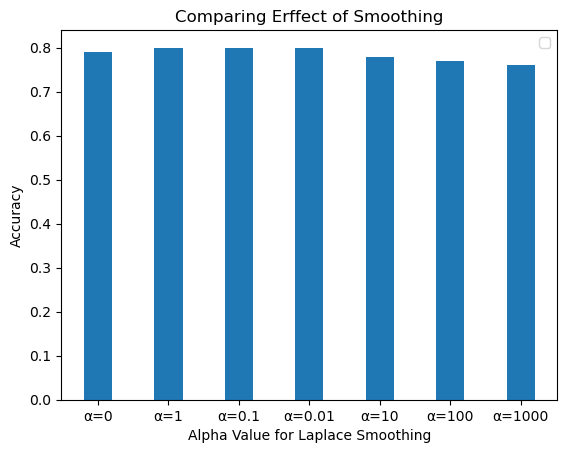

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# Here 'alpha=None' is without smoothing
X = ['α=0','α=1','α=0.1','α=0.01', 'α=10','α=100','α=1000']
accuracies = [0.79,0.80,0.80,0.80,0.78,0.77,0.76]
  
X_axis = np.arange(len(X))

plt.bar(X_axis,  accuracies, 0.4,  label = None)

  
plt.xticks(X_axis, X)
plt.xlabel("Alpha Value for Laplace Smoothing")
plt.ylabel("Accuracy")
plt.title("Comparing Erffect of Smoothing")
plt.legend()
plt.show()

